In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('/content/new dataset.zip')
print(df.head())

   Square_Footage  Appliance_Count  Insulation_Type  \
0        0.374540         0.185133         0.261706   
1        0.950714         0.541901         0.246979   
2        0.731994         0.872946         0.906255   
3        0.598658         0.732225         0.249546   
4        0.156019         0.806561         0.271950   

   Average_Outdoor_Temperature  HVAC_Type  Building_Age  Occupancy_Rate  \
0                     0.672703   0.571996      0.393636        0.648257   
1                     0.796681   0.805432      0.473436        0.172386   
2                     0.250468   0.760161      0.854547        0.872395   
3                     0.624874   0.153900      0.340004        0.613116   
4                     0.571746   0.149249      0.869650        0.157204   

   Lighting_Type  Peak_Hours_Usage    Season Energy_Consumption_Class  
0       0.038799          0.720268  0.913578                     High  
1       0.186773          0.687283  0.525360                   Medium  
2 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Square_Footage               1000 non-null   float64
 1   Appliance_Count              1000 non-null   float64
 2   Insulation_Type              1000 non-null   float64
 3   Average_Outdoor_Temperature  1000 non-null   float64
 4   HVAC_Type                    1000 non-null   float64
 5   Building_Age                 1000 non-null   float64
 6   Occupancy_Rate               1000 non-null   float64
 7   Lighting_Type                1000 non-null   float64
 8   Peak_Hours_Usage             1000 non-null   float64
 9   Season                       1000 non-null   float64
 10  Energy_Consumption_Class     1000 non-null   object 
dtypes: float64(10), object(1)
memory usage: 86.1+ KB


In [4]:
df.describe()

Square_Footage  Appliance_Count  Insulation_Type  \
count     1000.000000      1000.000000      1000.000000   
mean         0.490257         0.507017         0.502406   
std          0.292137         0.292190         0.290674   
min          0.004632         0.003218         0.000012   
25%          0.235973         0.241074         0.261351   
50%          0.496807         0.518734         0.500614   
75%          0.744320         0.760465         0.759104   
max          0.999718         0.999414         0.997821   

       Average_Outdoor_Temperature    HVAC_Type  Building_Age  Occupancy_Rate  \
count                  1000.000000  1000.000000   1000.000000     1000.000000   
mean                      0.490375     0.494105      0.498464        0.493309   
std                       0.286489     0.286810      0.289195        0.289734   
min                       0.000653     0.000031      0.006184        0.001428   
25%                       0.241901     0.244974      0.249380        0.240222   
50%                       0.484279     0.494598      0.490403        0.484643   
75%                       0.737541     0.739993      0.739852        0.756464   
max                       0.999558     0.997749      0.999350        0.999461   

       Lighting_Type  Peak_Hours_Usage       Season  
count    1000.000000       1000.000000  1000.000000  
mean        0.482371          0.486497     0.496795  
std         0.284914          0.282235     0.282153  
min         0.000241          0.000243     0.000053  
25%         0.235989          0.249384     0.264144  
50%         0.483991          0.478701     0.495187  
75%         0.714466          0.715905     0.736217  
max         0.998905          0.996013     0.999505

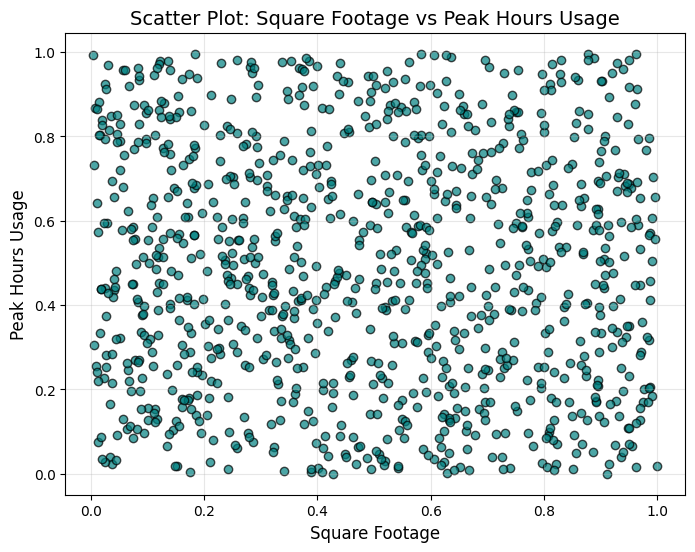

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Square_Footage'], df['Peak_Hours_Usage'], alpha=0.7, color='teal', edgecolors='k')
plt.title('Scatter Plot: Square Footage vs Peak Hours Usage', fontsize=14)
plt.xlabel('Square Footage', fontsize=12)
plt.ylabel('Peak Hours Usage', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [7]:
print(df.isnull().sum())

Square_Footage                 0
Appliance_Count                0
Insulation_Type                0
Average_Outdoor_Temperature    0
HVAC_Type                      0
Building_Age                   0
Occupancy_Rate                 0
Lighting_Type                  0
Peak_Hours_Usage               0
Season                         0
Energy_Consumption_Class       0
dtype: int64


In [9]:
X = df[['Square_Footage', 'Building_Age', 'Occupancy_Rate']]
y = df['Peak_Hours_Usage']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

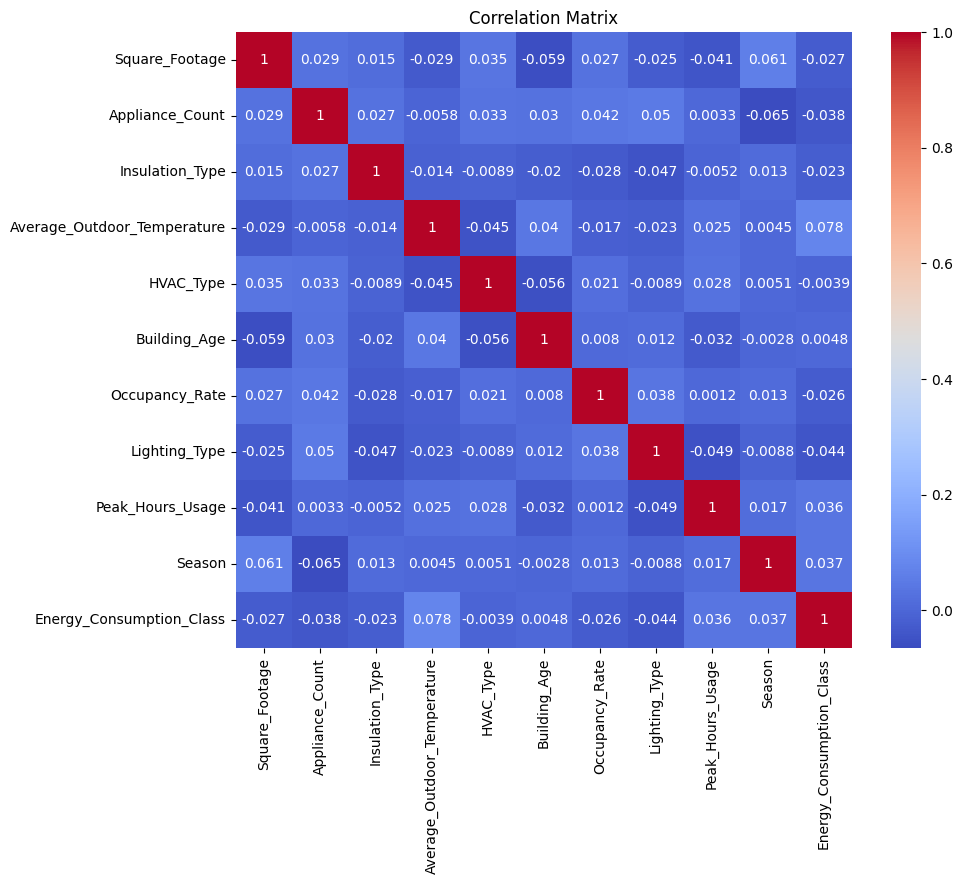

In [17]:
import seaborn as sns

def create_correlation_matrix(df):
    corr_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
    plt.title('Correlation Matrix')
    plt.show()

create_correlation_matrix(df)

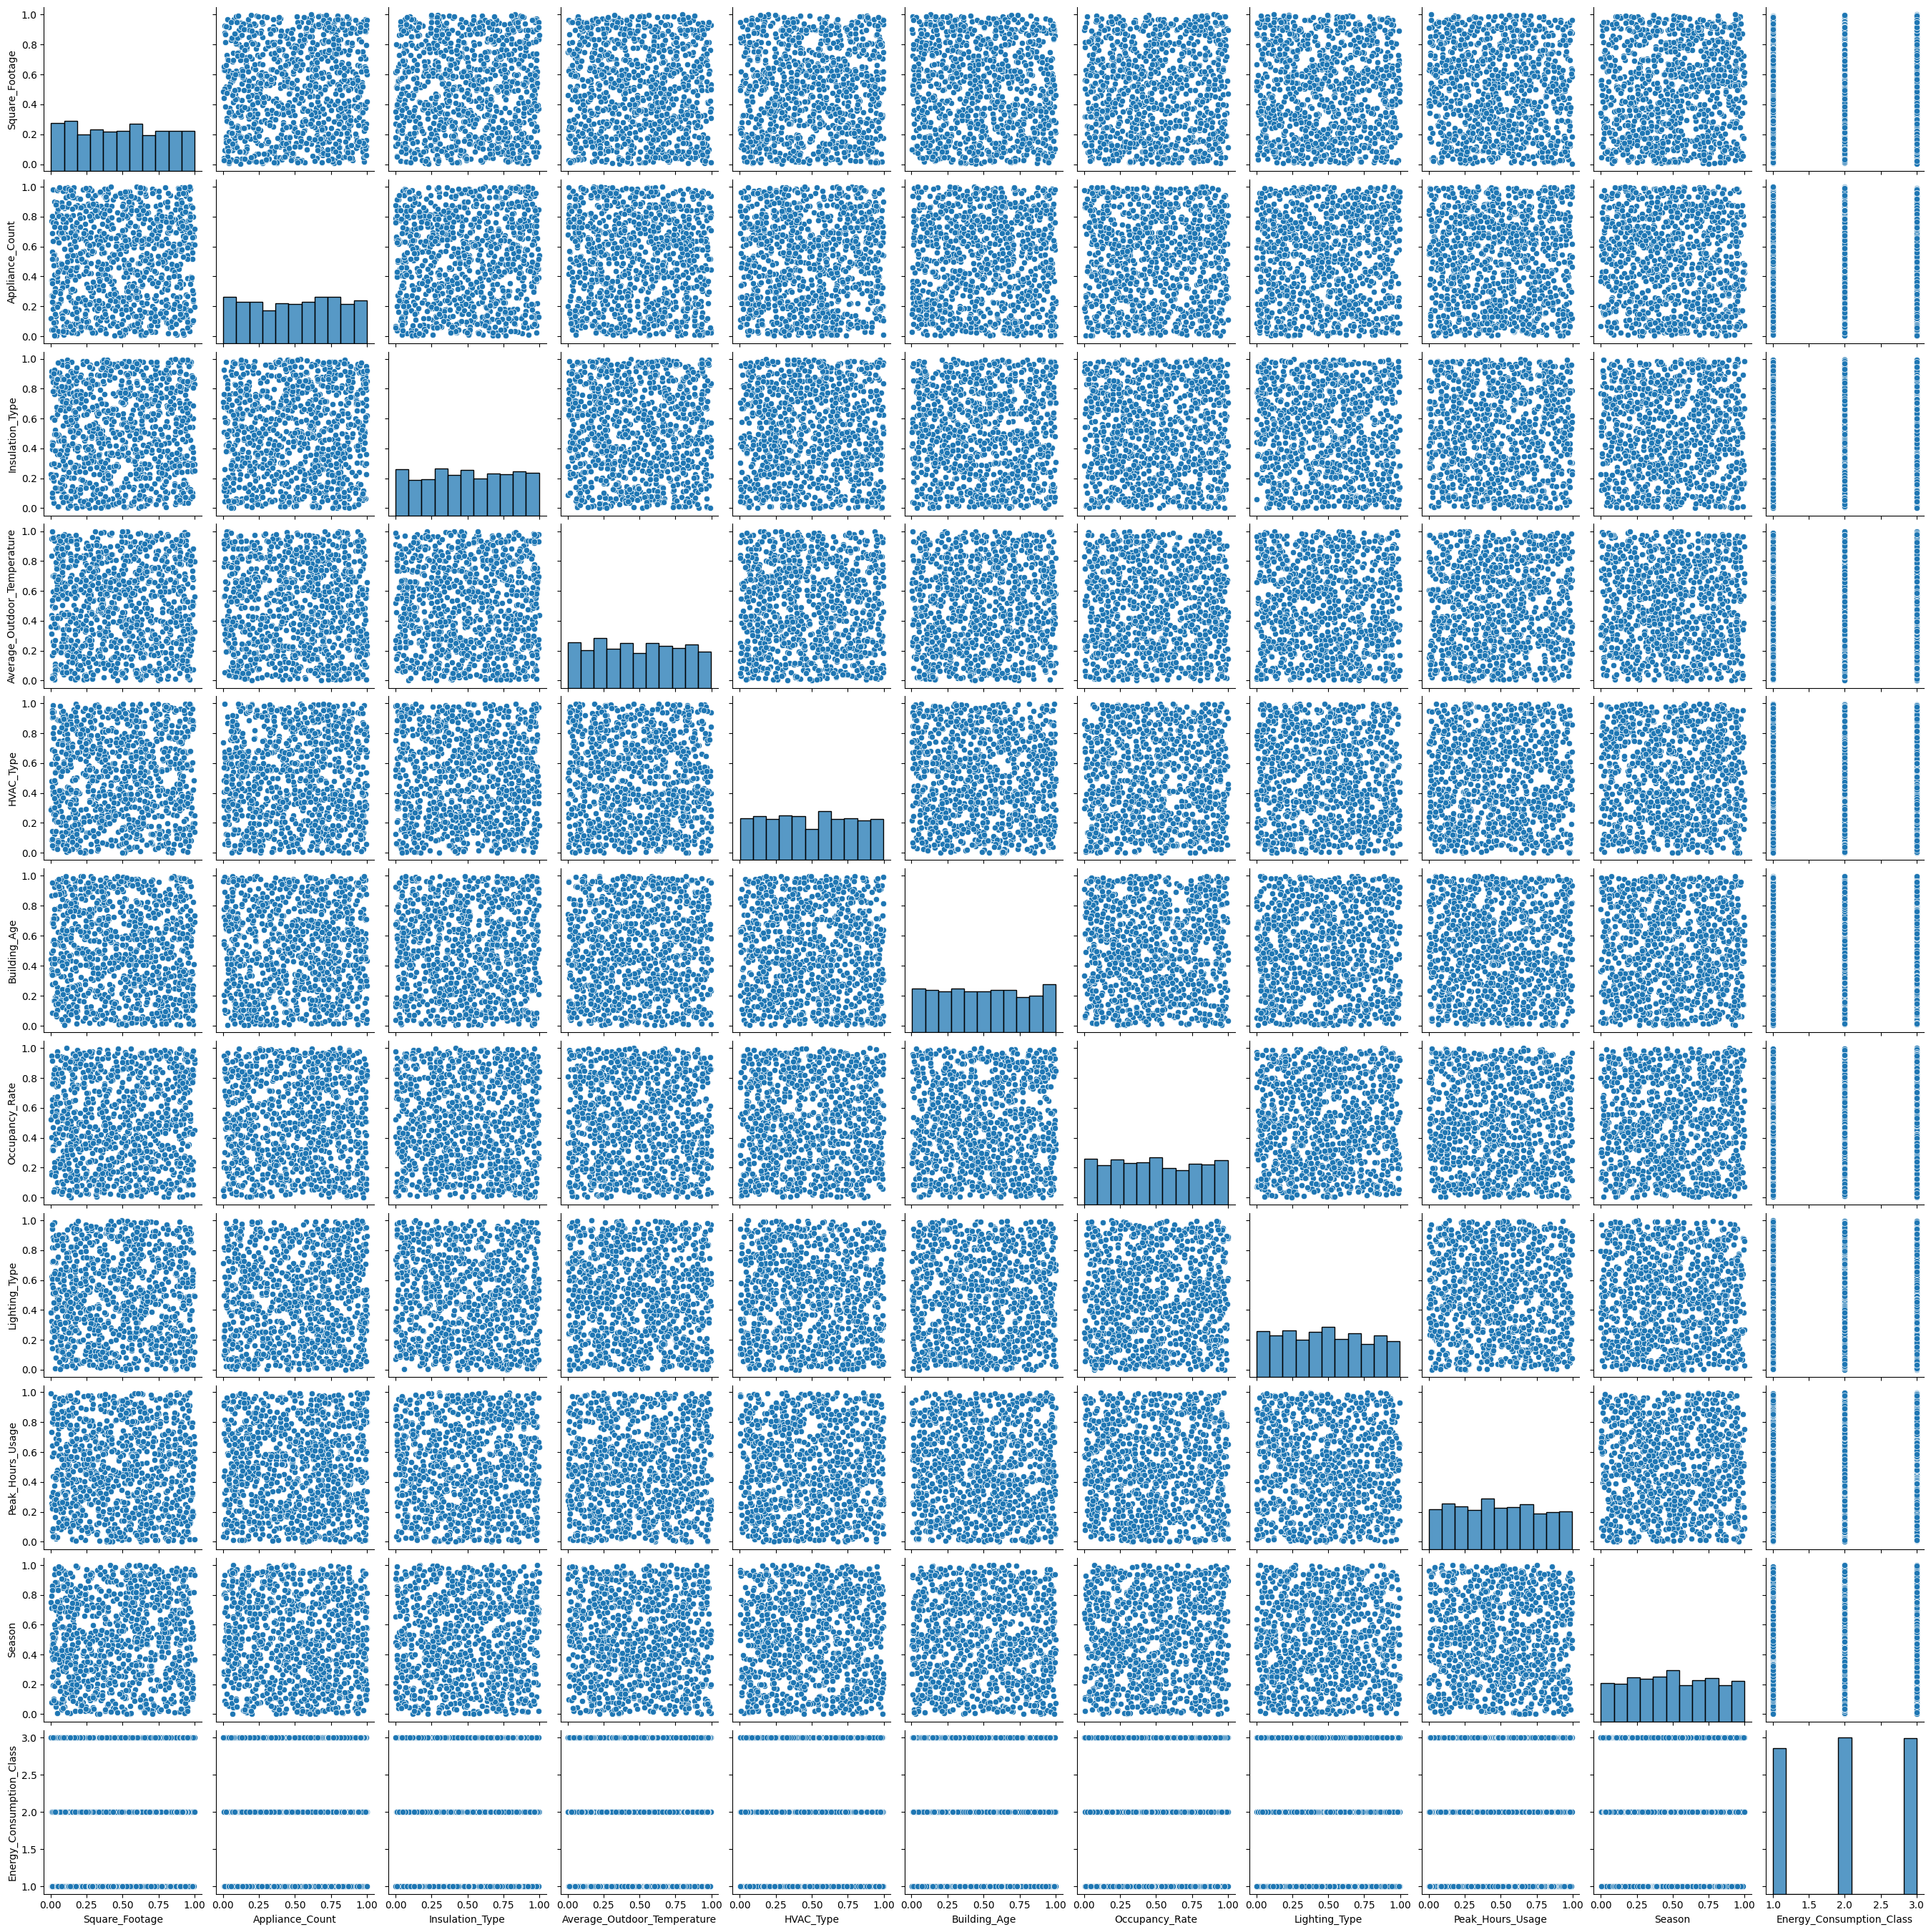

In [18]:
sns.pairplot(df)
plt.show()

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)

In [21]:
print("Slope: ", model.coef_)
print("y-intercept: ", model.intercept_)

Slope:  [-0.03134656 -0.01294822 -0.01111831]
y-intercept:  0.5189395332237735


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

In [23]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.07354571221211978


In [24]:
with open("linear_regression_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("linear_regression_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Use the loaded model to make predictions
loaded_y_pred = loaded_model.predict(X_test)

In [25]:
import numpy as np

mse = mean_squared_error(y_test, loaded_y_pred)
mae = mean_absolute_error(y_test, loaded_y_pred)
r2 = r2_score(y_test, loaded_y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.07354571221211978
Mean Absolute Error: 0.23088511250231164
R2 Score: -0.002627177966533889


In [46]:
import joblib
joblib.dump(model, 'new dataset_model.pkl')

['new dataset_model.pkl']

In [52]:
y_pred = model.predict(X_test)

In [53]:
y_pred

array([0.49716938, 0.48985383, 0.4909974 , 0.49903051, 0.48170114,
       0.47315403, 0.48978705, 0.47374454, 0.50223656, 0.49030264,
       0.47929477, 0.48321741, 0.48455004, 0.49659851, 0.5066175 ,
       0.5046676 , 0.4690531 , 0.49760882, 0.49527015, 0.50326176,
       0.4880584 , 0.48725104, 0.51011376, 0.50002806, 0.48394735,
       0.48682359, 0.48347617, 0.48524594, 0.51115681, 0.48809279,
       0.495805  , 0.46748748, 0.49606165, 0.47116802, 0.503419  ,
       0.48379145, 0.49444674, 0.48569705, 0.50885883, 0.4949987 ,
       0.49490623, 0.49104419, 0.49868571, 0.50814063, 0.51244971,
       0.49020378, 0.49558845, 0.49948845, 0.49957613, 0.49537517,
       0.4839457 , 0.50271114, 0.46773585, 0.48758771, 0.49703905,
       0.48904645, 0.50298372, 0.50721564, 0.48712037, 0.47749667,
       0.48485325, 0.48511823, 0.48977826, 0.51099003, 0.50882465,
       0.48665098, 0.48557068, 0.50022464, 0.47701994, 0.48417413,
       0.49305631, 0.50706569, 0.50550517, 0.50085932, 0.48206